##  Univariate and Multivariate Exploration Techniques

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [85]:
# Iterating the columns and removing blank spaces

for c in life.columns:
    life.rename(columns={c:c.replace(' ','_')},inplace=True)

In [86]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year and country
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = life['Year'].unique()
    countries = life['Country'].unique()
    
    for column_name in columns:

        new_column = column_name + '_n'
        #life[new_column] = life[column_name]
        
        for year in years:
            for country in countries:
                
                m=life[(life['Year']==year) & (life['Country']==country)][[column_name,'Year']].mean()
                mean = m.astype('float')

                group = (life['Year']==year)

                if math.isnan(mean[0]):            
                    mean_r = life[column_name].mean()

                else:
                    mean_r = life[(life['Year']==year) & (life['Country']==country)][column_name].mean()


                life.loc[group,column_name] = life.loc[group,column_name].fillna(mean_r)

                
    return 'Done'

In [87]:
general_imputation_year(['Hepatitis_B','GDP','Population','Alcohol','Income_composition_of_resources','Schooling','Total_expenditure'])

# we drop the null values after interpolation
life.dropna(inplace=True)

### Type of Variables (Categorical or Continuous)

**CATEGORICAL VARIABLES**

- Country 
- Year  
- Status 

**CONTINUOUS VARIABLES**

- Life_expectancy_
- Adult_Mortality
- infant_deaths
- Alcohol
- percentage_expenditure
- Hepatitis_B
- Measles_
- _BMI_
- under-five_deaths_
- Polio
- Total_expenditure
- Diphtheria_
- _HIV/AIDS
- GDP
- Population
- _thinness__1-19_years
- _thinness_5-9_years
- Income_composition_of_resources
- Schooling
- Hepatitis_B_n
- GDP_n
- Population_n
- Alcohol_n
- Income_composition_of_resources_n
- Schooling_n
- Total_expenditure_n

In [88]:
correlation_variable=life.corr()

In [89]:
correlation_variable['Life_expectancy_']

Year                               0.170772
Life_expectancy_                   1.000000
Adult_Mortality                   -0.693189
infant_deaths                     -0.197408
Alcohol                            0.364122
percentage_expenditure             0.381173
Hepatitis_B                        0.237963
Measles_                          -0.160525
_BMI_                              0.567055
under-five_deaths_                -0.223172
Polio                              0.464166
Total_expenditure                  0.207811
Diphtheria_                        0.478194
_HIV/AIDS                         -0.560382
GDP                                0.429037
Population                        -0.021565
_thinness__1-19_years             -0.476342
_thinness_5-9_years               -0.470744
Income_composition_of_resources    0.688342
Schooling                          0.714393
Name: Life_expectancy_, dtype: float64

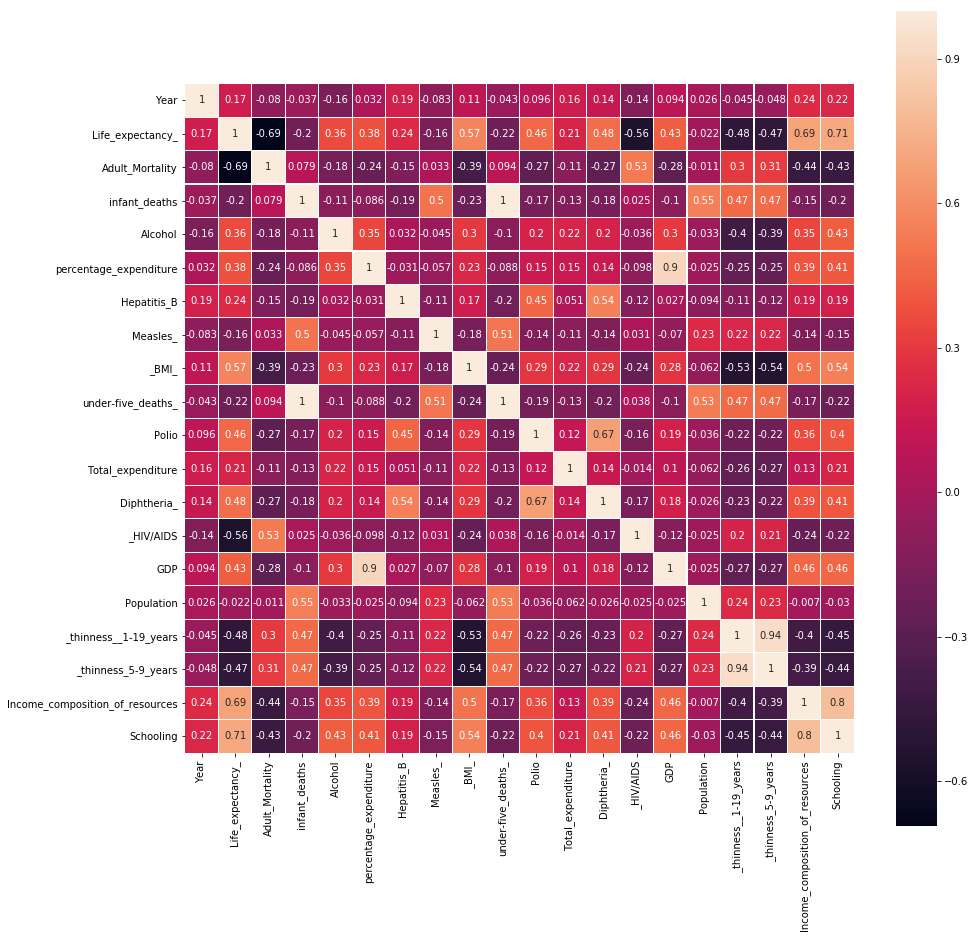

In [90]:
plt.figure(figsize = (15,15))
sns.heatmap(correlation_variable, square=True, annot=True, linewidths=0.1)

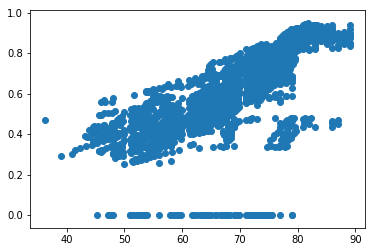

In [91]:
#Detecting correlation using visualization

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize

plt.scatter(life['Life_expectancy_'],winsorize(life['Income_composition_of_resources']))
plt.show()

In [92]:
#Winsorising variables

life['winsorizeAdult_Mortality']=winsorize(life['Adult_Mortality'], (0.10, 0))
life['winsorizeLife_expentancy']=winsorize(life['Life_expectancy_'], (0, 0.10))

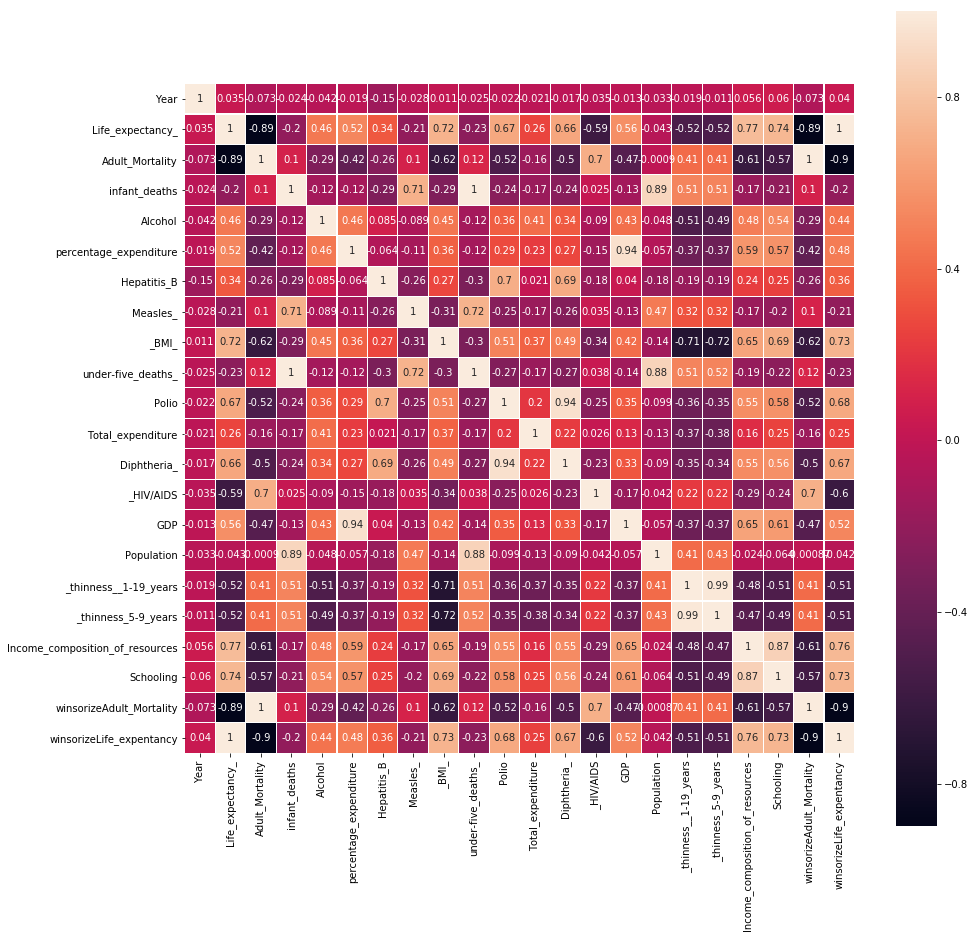

In [93]:
#Checking correlation, grouping by country

gb_corr = life.groupby("Country").mean().sort_values(by=['Life_expectancy_']).corr()
plt.figure(figsize = (15,15))
sns.heatmap(gb_corr, square=True, annot=True, linewidths=0.1)

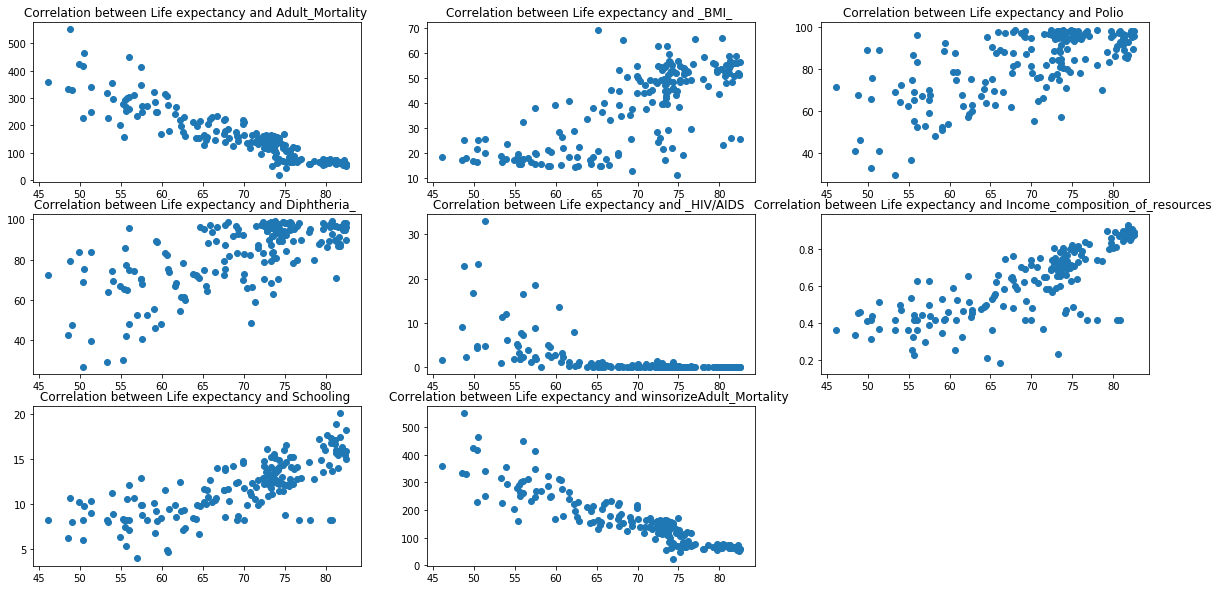

In [94]:
#Selecting variable with correlation coeficient is > 0.6 or < -0.6

selectedVariables=gb_corr[(gb_corr['winsorizeLife_expentancy']>0.6) | (gb_corr['winsorizeLife_expentancy'] < -0.6)]['winsorizeLife_expentancy']

x = list(selectedVariables.index)

plt.figure(figsize = (20,10))

contador=1

for i in x[1:len(x)-1]:

    plt.subplot(3,3,contador)
    plt.scatter(gb['Life_expectancy_'],gb[i])
    plt.title('Correlation between Life expectancy and {} '.format(i))
    contador += 1    
    
plt.show()

### Selected variables

In [95]:
selectedVariables

Life_expectancy_                   0.997588
Adult_Mortality                   -0.896828
_BMI_                              0.728371
Polio                              0.676829
Diphtheria_                        0.671471
_HIV/AIDS                         -0.603729
Income_composition_of_resources    0.755060
Schooling                          0.733264
winsorizeAdult_Mortality          -0.897353
winsorizeLife_expentancy           1.000000
Name: winsorizeLife_expentancy, dtype: float64